In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

### Exercise 6.1
For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [3]:
dfCon = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',header=None)

In [4]:
dfCon.columns = ['party',
                  'handicapped_infants',
                  'water_proj_cost_share',
                  'adopt_budget_res',
                  'phys_fee_freeze',
                  'el_salv_aid',
                  'relig_grp_schools',
                  'sat_test_ban',
                  'nic_contra_aid',
                  'mx_missile', 
                  'immigration',
                  'synfuels_corp_cut',
                  'edu_spend',
                  'supfund_sue',
                  'crime',
                  'duty_free_exp', 
                  'exp_admin_act_sa']

In [5]:
def binVotes(x):
    if x == 'n':
        x = 0
    elif x =='y':
        x = 1
    elif x == '?':
        x = np.nan
    else:
        x
    return x

In [6]:
dfCon = dfCon.applymap(binVotes)

In [7]:
dfCon.iloc[:,1:] = dfCon.iloc[:,1:].apply(lambda x: x.fillna(x.mean()),axis = 0) 

In [8]:
y = dfCon.iloc[:,0]
X = dfCon.iloc[:,1:]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=4444)

In [77]:
def modelthatSheit(algo,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test):
    mod = algo()
    modFit = mod.fit(X_train, y_train)
    y_pred = modFit.predict(X_test)
    accScore = accuracy_score(y_test,y_pred)
    precisionscore = precision_score(y_test,y_pred)
    recallscore = recall_score(y_test,y_pred)
    f1score = f1_score(y_test,y_pred)
    return {'model':modFit, 'accuracy': accScore, 
            'precision':precisionscore,'recall':recallscore,'f1':f1score}

In [40]:
mods = [KNeighborsClassifier, GaussianNB, LogisticRegression, DecisionTreeClassifier, SVC, RandomForestClassifier]

In [41]:
for m in mods:
    i=modelthatSheit(m)
    print('\n', m.__name__,'\n accuracy', i['accuracy'],'\n precision', i['precision'],'\n recall', i['recall'],'\n f1',i['f1'],)


 KNeighborsClassifier 
 accuracy 0.916030534351 
 precision 0.905660377358 
 recall 0.888888888889 
 f1 0.897196261682

 GaussianNB 
 accuracy 0.93893129771 
 precision 0.979166666667 
 recall 0.87037037037 
 f1 0.921568627451

 LogisticRegression 
 accuracy 0.93893129771 
 precision 0.96 
 recall 0.888888888889 
 f1 0.923076923077

 DecisionTreeClassifier 
 accuracy 0.93893129771 
 precision 0.96 
 recall 0.888888888889 
 f1 0.923076923077

 SVC 
 accuracy 0.954198473282 
 precision 0.961538461538 
 recall 0.925925925926 
 f1 0.943396226415

 RandomForestClassifier 
 accuracy 0.954198473282 
 precision 0.98 
 recall 0.907407407407 
 f1 0.942307692308


### Exercise 6.2
For each, draw the Precision-Recall curve, ROC curve and calculate the AUC.

In [101]:
def modelthatSheitROC(algo,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test, pos_label=None):
    mod = algo
    modFit = mod.fit(X_train, y_train)
    y_pred = modFit.predict_proba(X_test)
    precision, recall, threshold = precision_recall_curve(y_test, y_pred[:,1], pos_label=pos_label)
    fpr, tpr, threshold = roc_curve(y_test, y_pred[:,1], pos_label=pos_label);
    
    plt.subplot(121)
    plt.xlim(0,1)
    plt.ylabel('Recall')
    plt.xlabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.plot(precision, recall, label=mod.__str__().split('(')[0])
    plt.legend(loc=[.4,.6]);
    plt.subplot(122)
    plt.plot(fpr, tpr, label=mod.__str__().split('(')[0] + ' AUC: ' + str(auc(fpr, tpr))[:5])
    plt.legend(loc=[.4,.6])
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.title('ROC Curve');
#     return {'model':modFit,'fpr':fpr,'tpr':tpr,
#             'threshold':threshold,'precision':precision,'recall':recall, 'threshold':threshold}

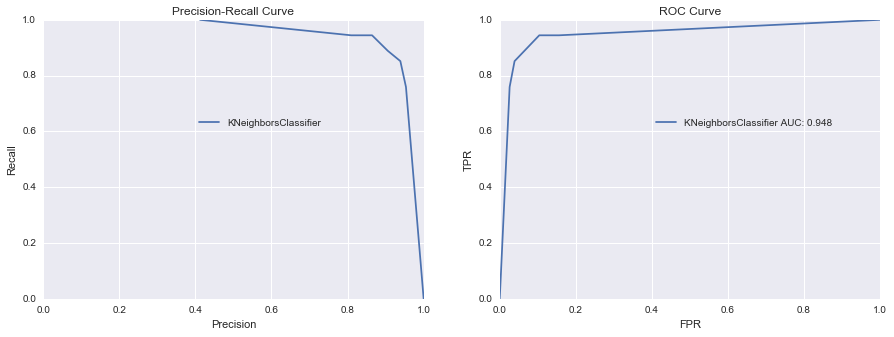

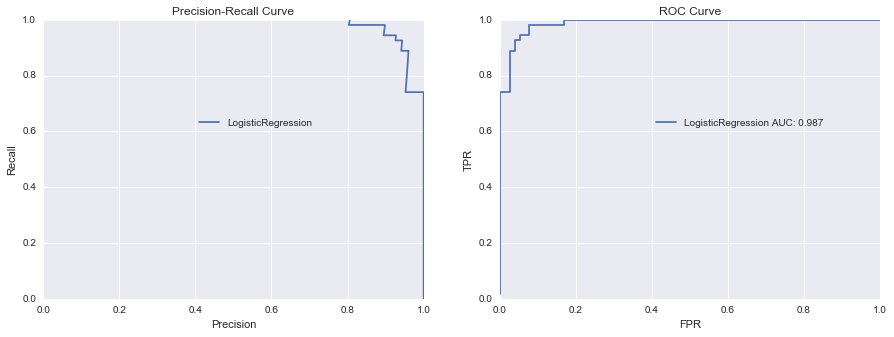

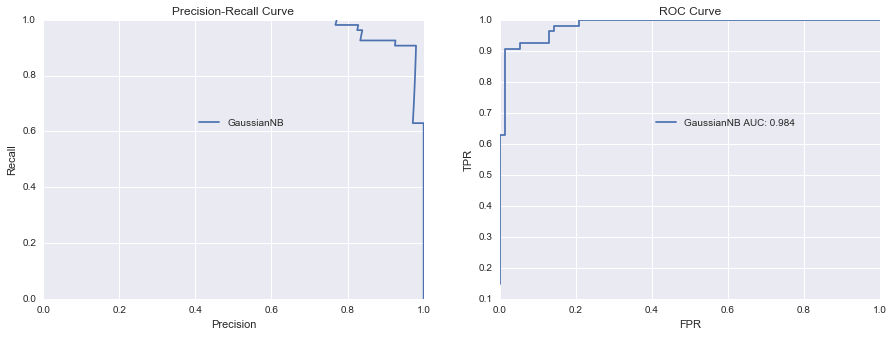

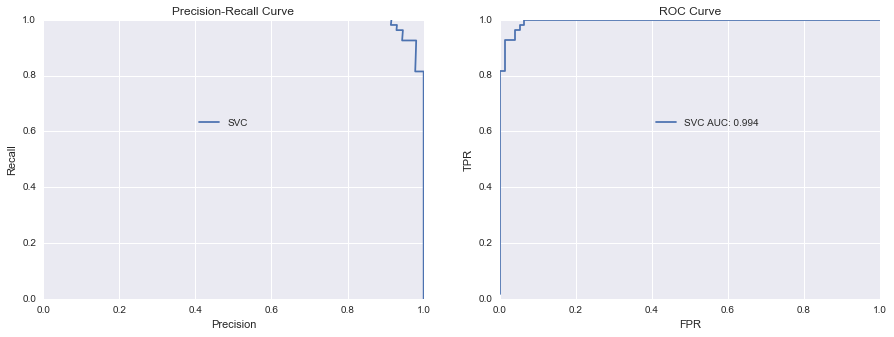

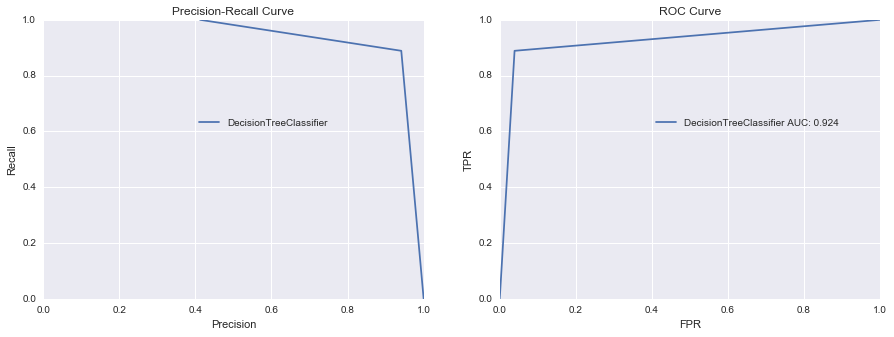

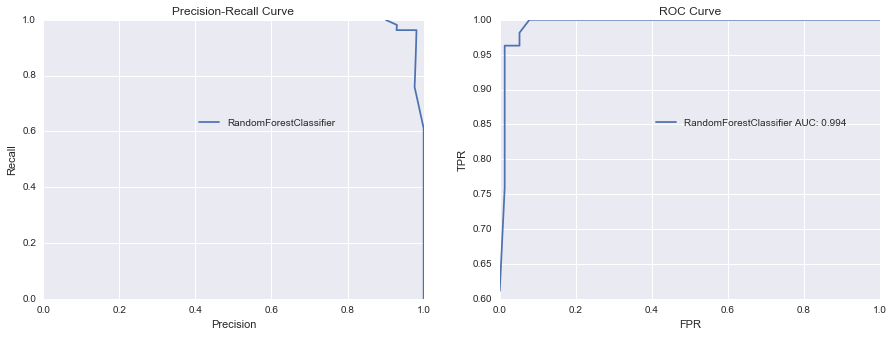

In [85]:

model_list = [KNeighborsClassifier(), LogisticRegression(), GaussianNB(), SVC(probability=True), DecisionTreeClassifier(), RandomForestClassifier()]

for m in model_list:
    plt.figure(figsize=(15,5))
    modelthatSheitROC(m,pos_label='republican')

###  Exercise 6.3
Draw the Precision-Recall curve, ROC curve (and calculate AUC) for the logistic regression classifier from Exercise 5.12 in 05-Classification Challenge that uses Haberman Survival Dataset


#### this is wrong,  I'll iron it out later

In [65]:
bc = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',header=None)

In [66]:
bc.columns = ['age_op','op_year','pos_ax_nodes', 'survival_5yr']

In [67]:
bcm =  pd.concat([pd.get_dummies(bc.survival_5yr),bc],axis=1)

In [88]:
Xbc = bcm.iloc[:,2:]
ybc = bcm.iloc[:,0]

In [95]:
X_trainbc, X_testbc, y_trainbc, y_testbc = train_test_split(Xbc,ybc, test_size=0.3, random_state=4444)

In [96]:
bcMod = modelthatSheit(LogisticRegression,X_train=X_trainbc,X_test=X_testbc,y_train=y_trainbc,y_test=y_testbc)

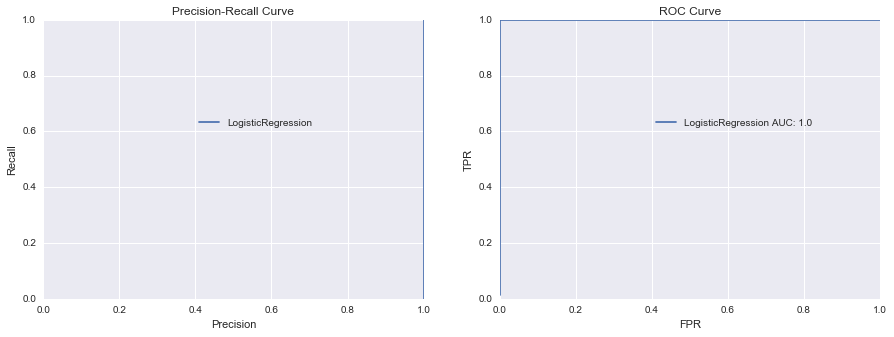

In [103]:
plt.figure(figsize=(15,5))
modelthatSheitROC(LogisticRegression(),X_train=X_trainbc,X_test=X_testbc,y_train=y_trainbc,y_test=y_testbc)

In [94]:
bcMod['accuracy']

1.0